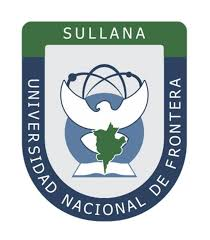image.png](attachment:image.png)
<center>
        <b>SEMANA DE LA CIENCIA</b><br> 
    <b>Sebastián Alonso Sosa Pérez</b>  <br>
    <b>Dr.Yesenia Saavedra Navarro</b> <br>
     <b>Dr.Cristhian Nicolás Aldana Yarlequé</b>
<br>
    
<h1>Aplicación del modelo logit</h1> <br>
</center>
<i>Creado:     25-11-2020 

# Importación de las siguientes librerias

Para la extracción de datos se usará el **web scraping** desde un repositorio de **Git Hud** el cual es [Base de datos](https://raw.githubusercontent.com/joanby/machinelearning-az/master/datasets/Part%203%20-%20Classification/Section%2014%20-%20Logistic%20Regression/Social_Network_Ads.csv).\
Se usarán las siguientes librerias: 
* ```numpy``` esta libreria se trabaja arreglos y operaciones mátematicas. 
* ```matplotlib``` esta libreria se trabaja la parte gráfica. 
* ```pandas``` esta libreria se utiliza para la creación de *data frame*.
* ```requests``` y ```io``` se usarán para la extracción de los datos de la web. 
* ```sklearn``` es una libreria muy usada para el machine learning.

> Nota: La base datos será escalada debido que hay una diferencia muy grande en sus magnitudes.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from io import StringIO
import warnings 

In [27]:
url = "https://raw.githubusercontent.com/joanby/machinelearning-az/master/datasets/Part%203%20-%20Classification/Section%2014%20-%20Logistic%20Regression/Social_Network_Ads.csv"
content = requests.get(url,verify=False).text.replace("<br>","\n").strip()
csv =  StringIO(content)
dataset = pd.read_csv(csv)
print(dataset.head())
print(type(dataset))

C:\Users\daffy\anaconda3\envs\ata\lib\site-packages\urllib3\connectionpool.py:986: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0
<class 'pandas.core.frame.DataFrame'>


In [28]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
print("Los coeficientes del modelo: ")
print("="*60)
print(classifier.coef_)
print("="*60)

Los coeficientes del modelo: 
[[2.07669377 1.1102991 ]]


In [32]:
y_pred = classifier.predict(X_test)


In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[65  3]
 [ 8 24]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


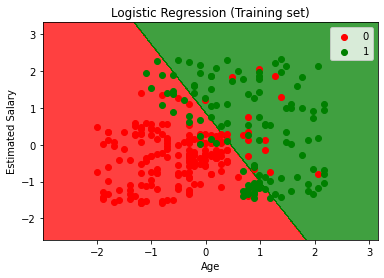

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


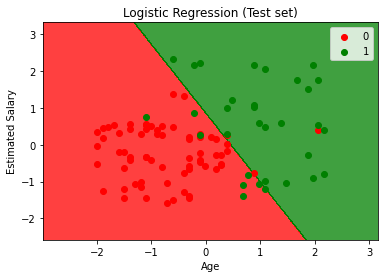

In [35]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

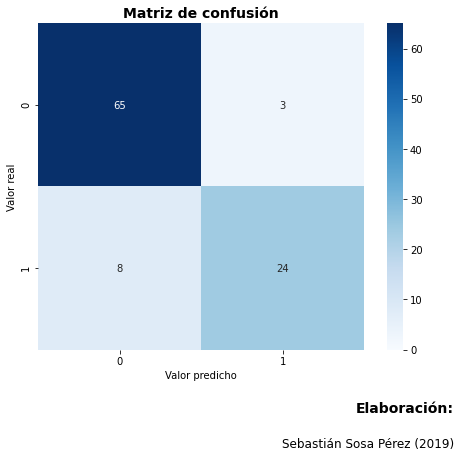

In [36]:
import seaborn as sns 

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, square = True, cmap = 'Blues',
vmin = 0)
ax.set_xlabel("Valor predicho")
ax.set_ylabel("Valor real")
ax.set_title("Matriz de confusión", size = 14,
fontweight = "bold")
fig.text(.9,-.02,
"Elaboración:",
fontsize = 14, fontweight = "bold",
ha = "right")
fig.text(.9,-.1,
"Sebastián Sosa Pérez (2019)",
fontsize = 12, ha = "right")
plt.show()

In [49]:
d=classifier.score(X_test,y_test)
print("la eficiencia del modelo",d*100,"%")

la eficiencia del modelo 89.0 %


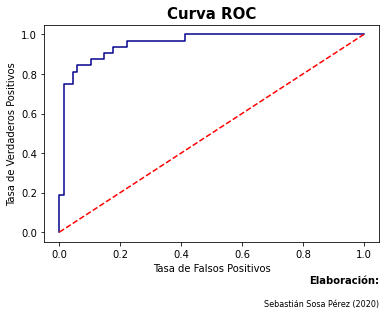

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
FP, VP, umbral = roc_curve(y_test,
classifier.predict_proba(X_test)[:,1])
fig, ax = plt.subplots()
ax.plot(FP, VP, color = "darkblue")
ax.plot([0,1], [0,1], linestyle = "--", color = "red")
ax.set_xlabel("Tasa de Falsos Positivos")
ax.set_ylabel("Tasa de Verdaderos Positivos")
ax.set_title("Curva ROC",
fontweight = "bold",
size = 15)
fig.text(.9,-.02,
"Elaboración:",
fontsize = 10, fontweight = "bold",
ha = "right")
fig.text(.9,-.1,
"Sebastián Sosa Pérez (2020)",
fontsize = 8, ha = "right")
plt.show()